In [6]:
import urllib.request

response = urllib.request.urlopen("https://www.example.com")
print(response.read())


b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [5]:
pip install urllib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [1]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse


In [11]:
data

,Unnamed: 0,url,type,type_encoded
0,0,https://mitsui-jyuku.mixh.jp/uploads/6343fvase...,malware,2
1,1,http://vbncdfaewoi.ug/az2.exe,malware,2
2,2,http://www.pensiiilfov.ro/index.php?option=com...,defacement,1
3,3,williameworkman.com/,benign,0
4,4,http://archive.salisburyjournal.co.uk/2000/8/3...,spam,4
...,...,...,...,...
472869,472869,news.cnet.com/2100-1023-245263.html,phishing,3
472870,472870,http://saglikramazan20bgb.net/20gb_hediye_inte...,malware,2
472871,472871,http://www.icci.com.br/index.php?option=com_k2...,defacement,1
472872,472872,http://www.niobestudio.com/index.php/component...,defacement,1


In [16]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
data=pd.read_csv('final.csv')
# Function to extract URL features
def extract_url_features(url):
    parsed_url = urlparse(url)
    features = {
        'url_length': len(url),
        'num_special_chars': len(re.findall(r'[?&=/_-]', url)),
        'num_subdomains': len(parsed_url.netloc.split('.')) - 2 if url.count('.') > 1 else 0,
        'has_https': int(parsed_url.scheme == 'https'),
        'has_ip_address': int(bool(re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', url))),
        'path_length': len(parsed_url.path),
        'query_length': len(parsed_url.query)
    }
    return features

# Apply URL feature extraction
data_url_features = data['url'].apply(lambda x: pd.Series(extract_url_features(x)))

# One-hot encode 'type'
data_type_encoded = pd.get_dummies(data['type'], prefix='type')

# Normalize 'type_encoded'
data['type_encoded_norm'] = (data['type_encoded'] - data['type_encoded'].min()) / (data['type_encoded'].max() - data['type_encoded'].min())

# Combine all features
data_features = pd.concat([data, data_url_features, data_type_encoded], axis=1)

print(data_features.head())


                                     url        type  type_encoded  \
0        http://example.com/test?query=1   malicious             1   
1    https://sub.domain.com/path/to/page      benign             0   
2          http://192.168.1.1/index.html  suspicious             2   
3  https://example.com/test?query=1/ca=/   malicious             1   
4   http://example.com/test?query=1??=yz   malicious             1   

                                      augmented_urls  type_encoded_norm  \
0  [https://example.com/test?query=1/ca=/, http:/...                0.5   
1  [https://sub.domain.com/path/to/pageaa4=z, htt...                0.0   
2  [https://192.168.1.1/index.html5bc/b, https://...                1.0   
3                                                NaN                0.5   
4                                                NaN                0.5   

   url_length  num_special_chars  num_subdomains  has_https  has_ip_address  \
0          31                  5               0 

C:\Users\ha934\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8994
Test Accuracy: 0.8996
F1 Score: 0.8981


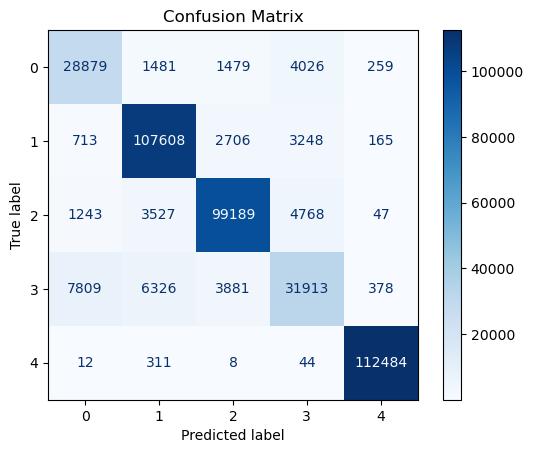

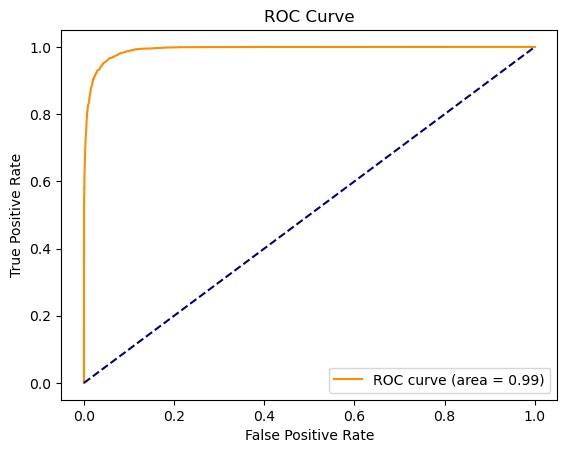

In [6]:
# Train ML model
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression Metrics:
Train Accuracy: 0.9015
Test Accuracy: 0.9017
F1 Score: 0.9004

Random Forest Metrics:
Train Accuracy: 0.9462
Test Accuracy: 0.9401
F1 Score: 0.9398


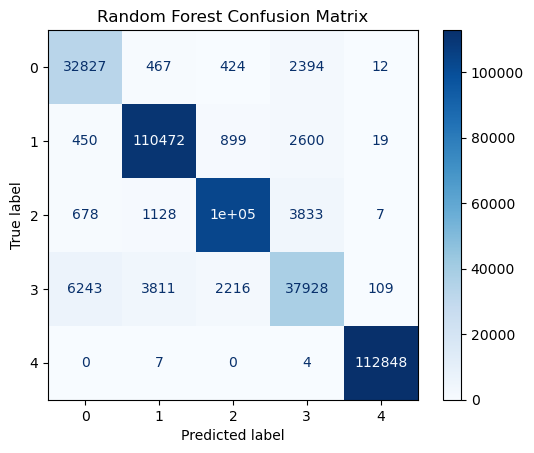

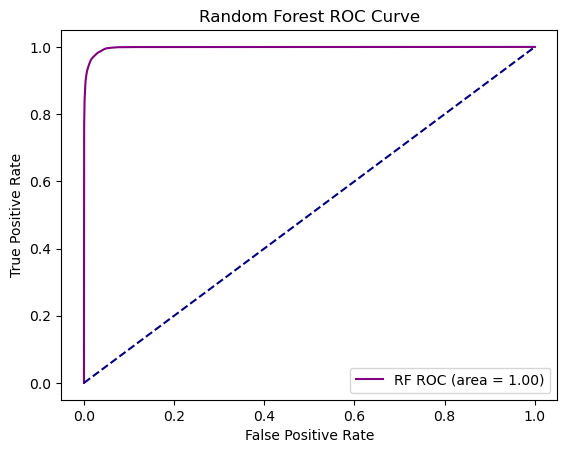

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import random


data=pd.read_csv('final.csv')
# Data Augmentation: Generate synthetic URLs
def augment_url(url, n=3):
    augmented_urls = []
    for _ in range(n):
        if 'http' in url:
            new_url = url.replace('http', random.choice(['http', 'https']))
            new_url += ''.join(random.choices('/abcxyz?=12345', k=5))
            augmented_urls.append(new_url)
    return augmented_urls

# Apply augmentation
data['augmented_urls'] = data['url'].apply(lambda x: augment_url(x))
augmented_data = pd.DataFrame([(url, row['type'], row['type_encoded']) for idx, row in data.iterrows() for url in row['augmented_urls']], columns=['url', 'type', 'type_encoded'])
data = pd.concat([data, augmented_data], ignore_index=True)

# TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_features = tfidf_vectorizer.fit_transform(data['url']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])

# Combine features
data_features = pd.concat([tfidf_df, data['type_encoded']], axis=1)

# Train-test split
X = data_features.drop(columns=['type_encoded'])
y = data_features['type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate Logistic Regression model
y_pred_lr = logistic_model.predict(X_test)
y_prob_lr = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Metrics for Logistic Regression
train_accuracy_lr = logistic_model.score(X_train, y_train)
test_accuracy_lr = logistic_model.score(X_test, y_test)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Logistic Regression Metrics:")
print(f"Train Accuracy: {train_accuracy_lr:.4f}")
print(f"Test Accuracy: {test_accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Metrics for Random Forest
train_accuracy_rf = random_forest_model.score(X_train, y_train)
test_accuracy_rf = random_forest_model.score(X_test, y_test)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Metrics:")
print(f"Train Accuracy: {train_accuracy_rf:.4f}")
print(f"Test Accuracy: {test_accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, color='purple', label=f'RF ROC (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch [1/100], Loss: 1.6093, Train Accuracy: 0.4327, Test Accuracy: 0.4334
Epoch [2/100], Loss: 1.5301, Train Accuracy: 0.5718, Test Accuracy: 0.5670
Epoch [3/100], Loss: 1.3841, Train Accuracy: 0.6910, Test Accuracy: 0.6865
Epoch [4/100], Loss: 1.2629, Train Accuracy: 0.7240, Test Accuracy: 0.7171
Epoch [5/100], Loss: 1.1899, Train Accuracy: 0.7347, Test Accuracy: 0.7290
Epoch [6/100], Loss: 1.1541, Train Accuracy: 0.7764, Test Accuracy: 0.7665
Epoch [7/100], Loss: 1.1233, Train Accuracy: 0.8237, Test Accuracy: 0.8157
Epoch [8/100], Loss: 1.0868, Train Accuracy: 0.8193, Test Accuracy: 0.8097
Epoch [9/100], Loss: 1.0859, Train Accuracy: 0.8244, Test Accuracy: 0.8134
Epoch [10/100], Loss: 1.0786, Train Accuracy: 0.8316, Test Accuracy: 0.8209
Epoch [11/100], Loss: 1.0631, Train Accuracy: 0.8541, Test Accuracy: 0.8429
Epoch [12/100], Loss: 1.0510, Train Accuracy: 0.8539, Test Accuracy: 0.8430
Epoch [13/100], Loss: 1.0510, Train Accuracy: 0.8595, Test Accuracy: 0.8479
Epoch [14/100], Loss:

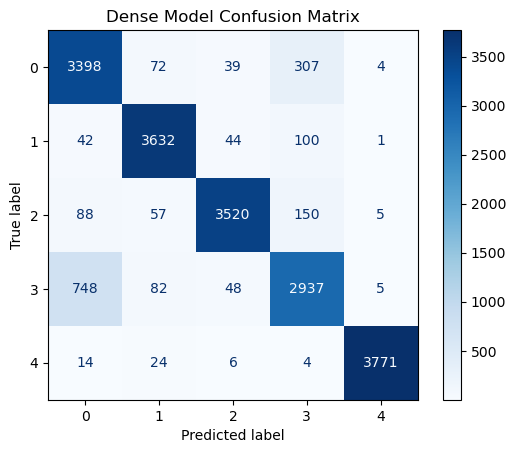

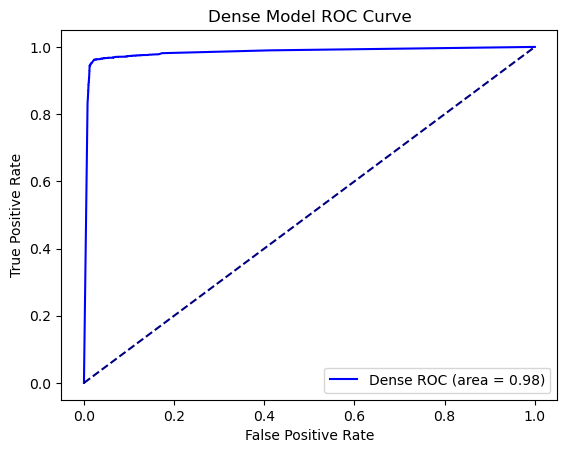

In [10]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('final.csv')

def augment_url(url, n=3):
    augmented_urls = []
    for _ in range(n):
        if 'http' in url:
            new_url = url.replace('http', random.choice(['http', 'https']))
            new_url += ''.join(random.choices('/abcxyz?=12345', k=5))
            augmented_urls.append(new_url)
    return augmented_urls

# Apply augmentation
data['augmented_urls'] = data['url'].apply(lambda x: augment_url(x))
augmented_data = pd.DataFrame([(url, row['type_encoded']) for _, row in data.iterrows() for url in row['augmented_urls']], columns=['url', 'type_encoded'])
data = pd.concat([data, augmented_data], ignore_index=True)

# Generate embeddings
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedding_model.encode(data['url'].tolist())

# Normalize embeddings
scaler = StandardScaler()
embeddings = scaler.fit_transform(embeddings)

# Prepare features and labels
data_features = pd.concat([pd.DataFrame(embeddings), data['type_encoded']], axis=1)
X = data_features.drop(columns=['type_encoded']).values
y = data_features['type_encoded'].values

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define a simple dense neural network
class DenseClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DenseClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return self.softmax(x)

# Model parameters
input_size = X_train.shape[1]
hidden_size = 256
output_size = len(np.unique(y))

# Initialize model, loss, and optimizer
dense_model = DenseClassifier(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(dense_model.parameters(), lr=0.005)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    dense_model.train()
    optimizer.zero_grad()
    outputs = dense_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        train_accuracy = accuracy_score(y_train, torch.argmax(dense_model(X_train_tensor), dim=1).numpy())
        test_accuracy = accuracy_score(y_test, torch.argmax(dense_model(X_test_tensor), dim=1).numpy())
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Save model
torch.save(dense_model.state_dict(), 'dense_model.pth')

# Evaluate the model
dense_model.eval()
y_pred_logits = dense_model(X_test_tensor)
y_pred = torch.argmax(y_pred_logits, dim=1).numpy()

# Metrics
test_accuracy_dense = accuracy_score(y_test, y_pred)
f1_dense = f1_score(y_test, y_pred, average='weighted')

print("\nDense Model Metrics:")
print(f"Test Accuracy: {test_accuracy_dense:.4f}")
print(f"F1 Score: {f1_dense:.4f}")

# Confusion Matrix
cm_dense = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_dense).plot(cmap='Blues')
plt.title('Dense Model Confusion Matrix')
plt.show()

# ROC Curve
with torch.no_grad():
    y_prob_dense = torch.nn.functional.softmax(y_pred_logits, dim=1)[:, 1].numpy()
fpr_dense, tpr_dense, _ = roc_curve(y_test, y_prob_dense, pos_label=1)
roc_auc_dense = auc(fpr_dense, tpr_dense)

plt.plot(fpr_dense, tpr_dense, color='blue', label=f'Dense ROC (area = {roc_auc_dense:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dense Model ROC Curve')
plt.legend(loc='lower right')
plt.show()


Summary Statistics:
          Unnamed: 0   type_encoded     url_length  num_special_chars  \
count  472874.000000  472874.000000  472874.000000      472874.000000   
mean   236436.500000       1.992247      72.645975           7.141782   
std    136507.109933       1.415107      85.373792           6.264715   
min         0.000000       0.000000       1.000000           0.000000   
25%    118218.250000       1.000000      34.000000           3.000000   
50%    236436.500000       2.000000      52.000000           5.000000   
75%    354654.750000       3.000000      86.000000          10.000000   
max    472873.000000       4.000000    2081.000000         169.000000   

       num_subdomains      has_https  has_ip_address    path_length  \
count   472874.000000  472874.000000   472874.000000  472874.000000   
mean         0.582976       0.072654        0.100094      31.256153   
std          1.193015       0.259567        0.300126      25.485919   
min         -1.000000       0.000000  

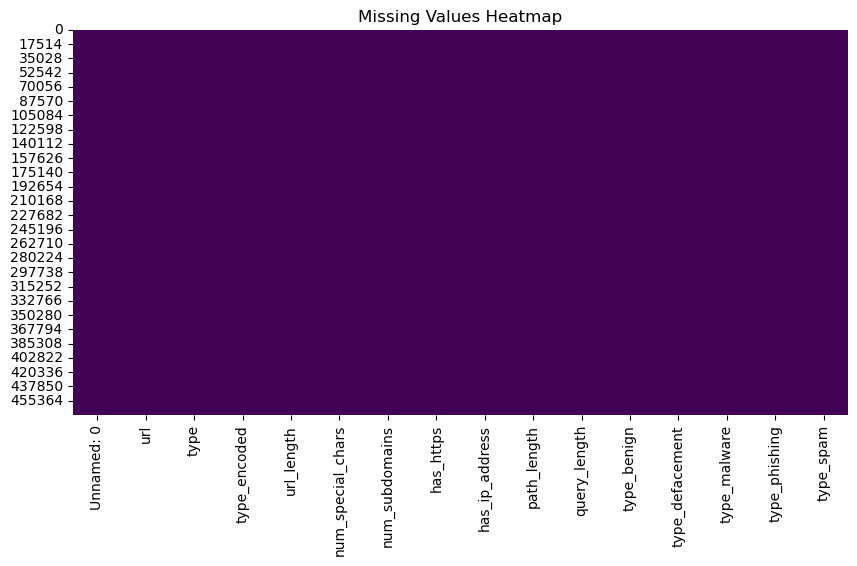

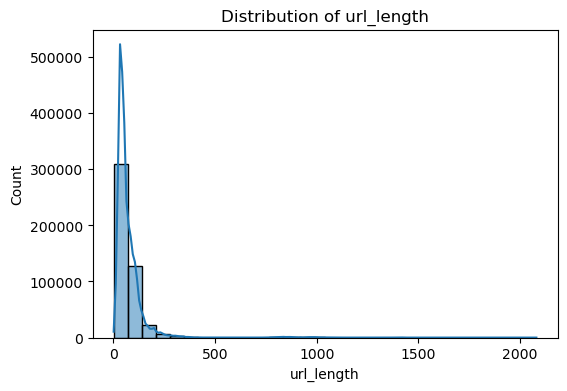

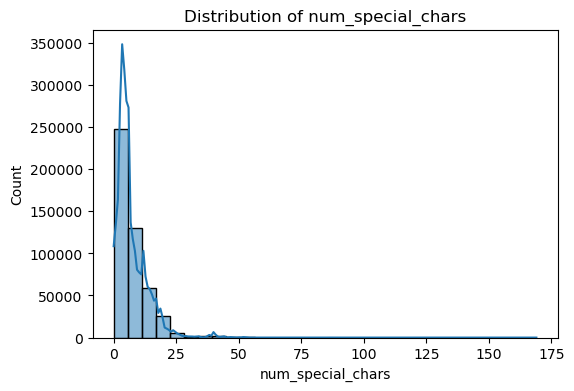

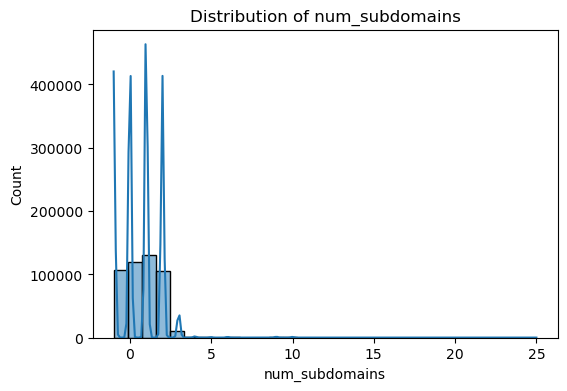

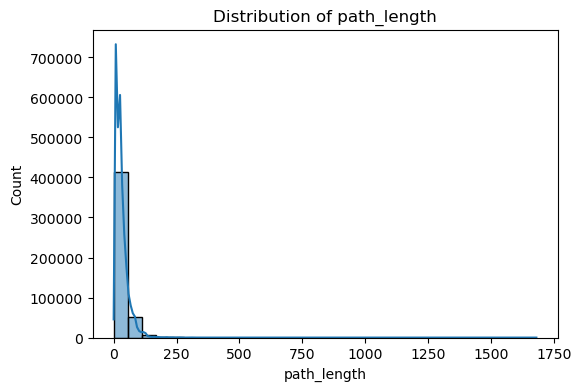

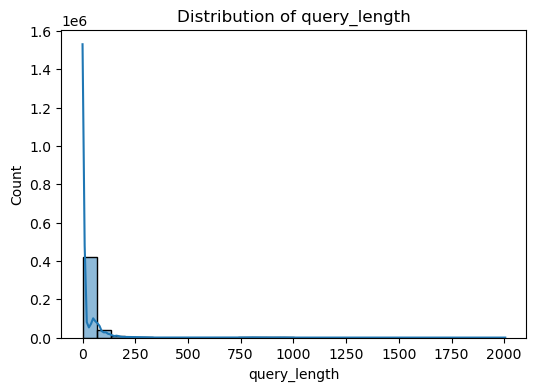

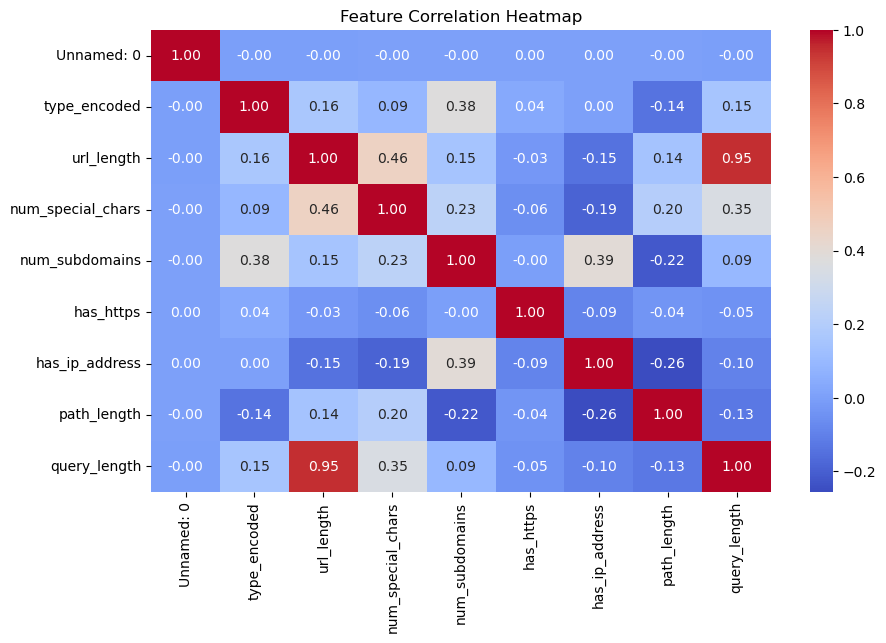

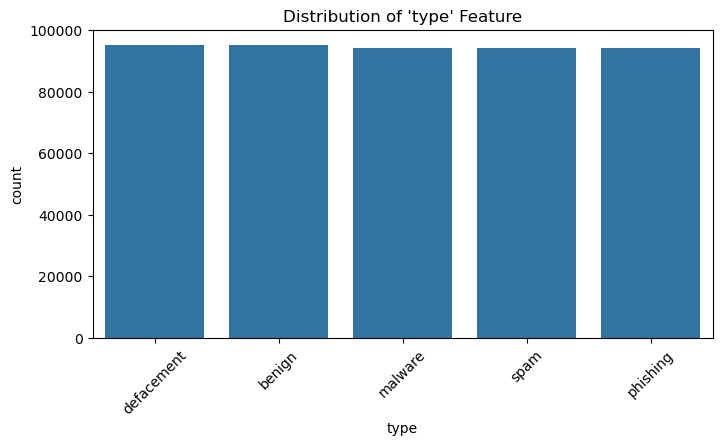

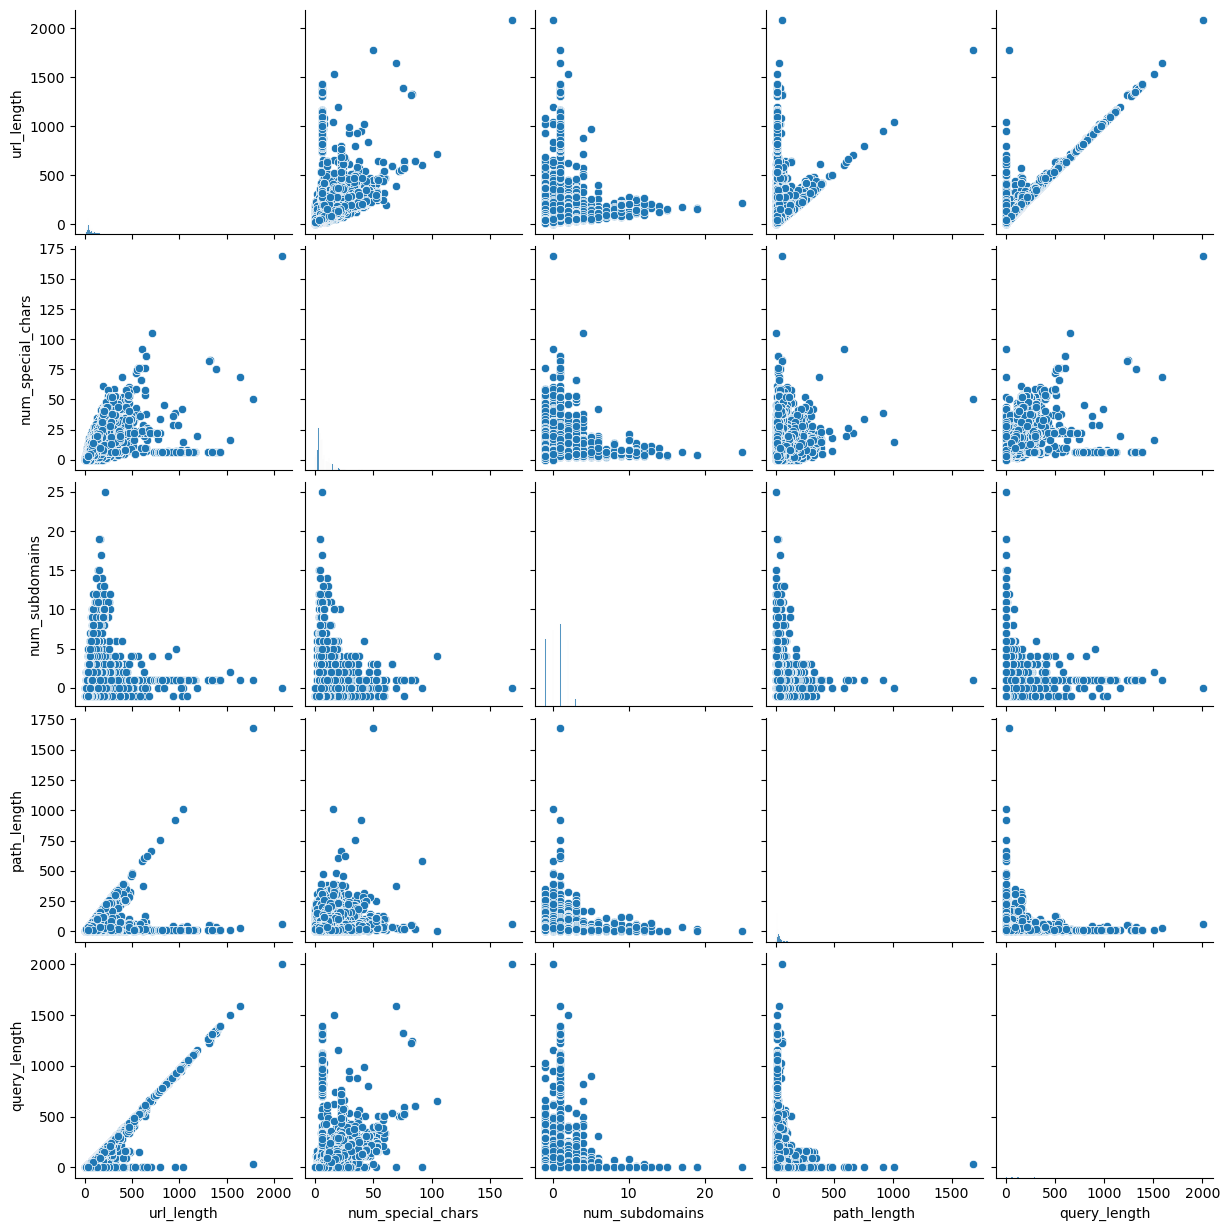

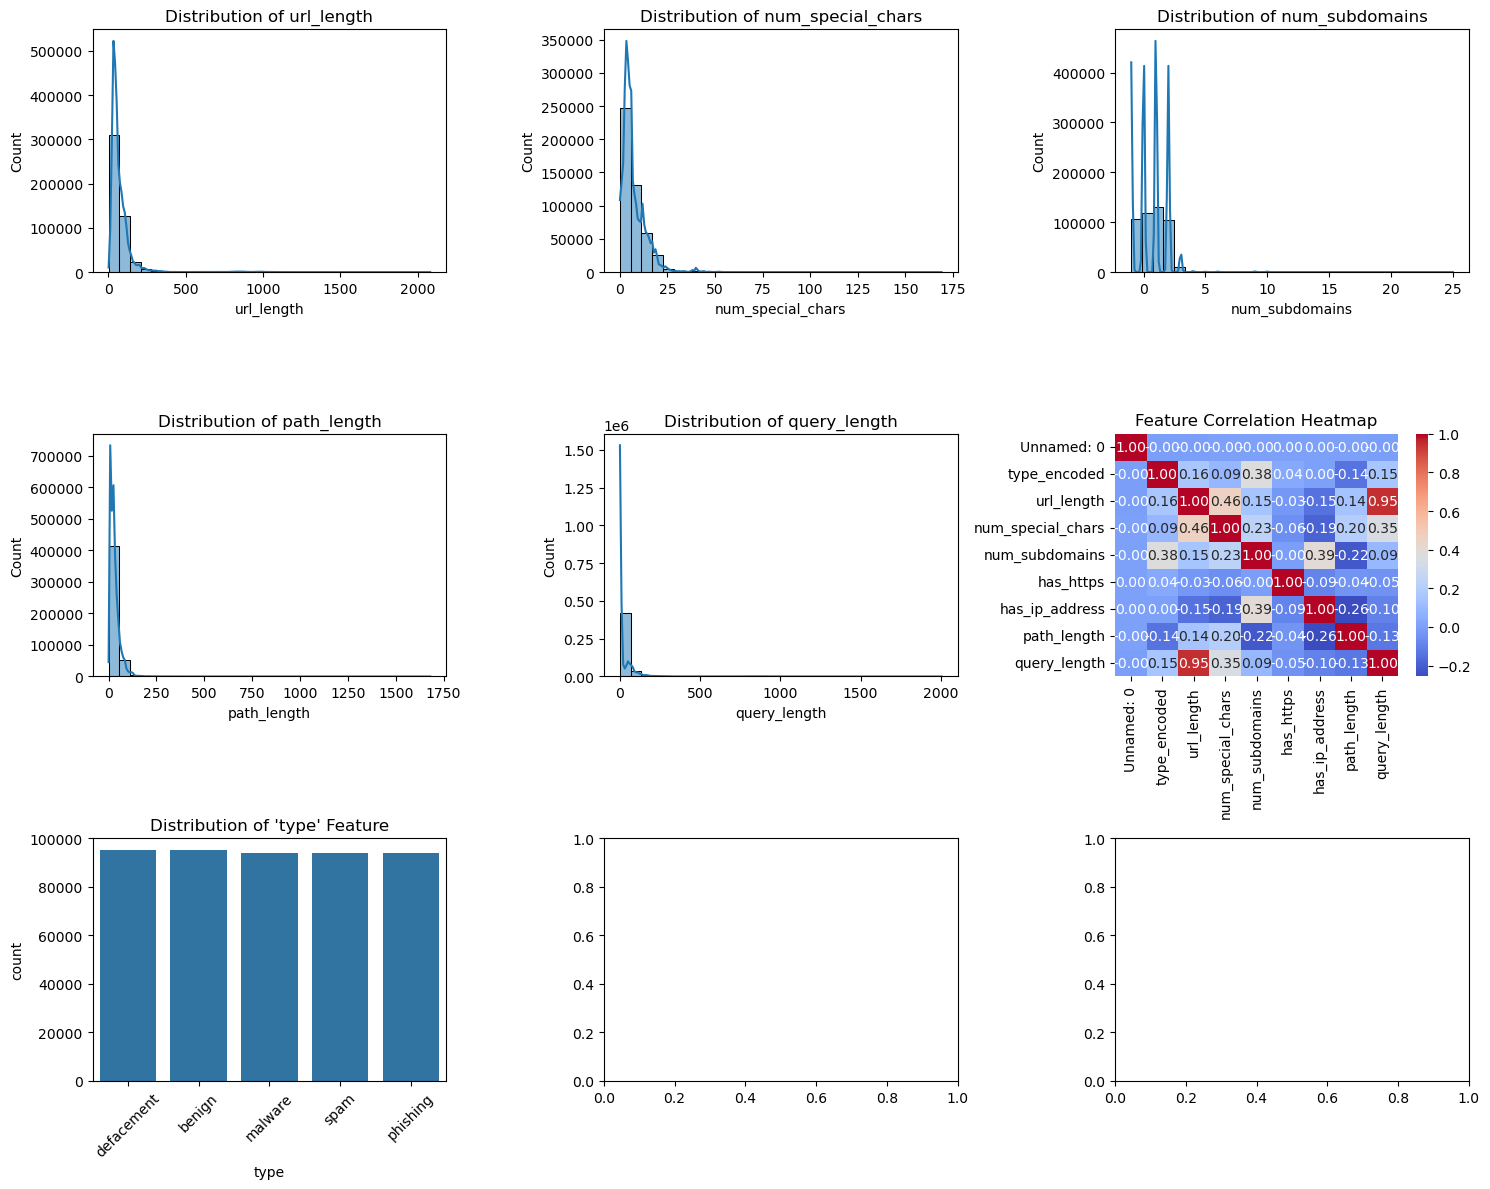

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse

# Load dataset
data = pd.read_csv('final.csv')

# Function to extract URL features
def extract_url_features(url):
    parsed_url = urlparse(url)
    features = {
        'url_length': len(url),
        'num_special_chars': len(re.findall(r'[?&=/_-]', url)),
        'num_subdomains': len(parsed_url.netloc.split('.')) - 2 if url.count('.') > 1 else 0,
        'has_https': int(parsed_url.scheme == 'https'),
        'has_ip_address': int(bool(re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', url))),
        'path_length': len(parsed_url.path),
        'query_length': len(parsed_url.query)
    }
    return features

# Apply URL feature extraction
data_url_features = data['url'].apply(lambda x: pd.Series(extract_url_features(x)))

# One-hot encode 'type'
data_type_encoded = pd.get_dummies(data['type'], prefix='type')

# Combine all features
data = pd.concat([data, data_url_features, data_type_encoded], axis=1)

# Summary statistics
print("Summary Statistics:")
print(data.describe())

# Missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Feature distributions
num_features = ['url_length', 'num_special_chars', 'num_subdomains', 'path_length', 'query_length']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Categorical feature count plot
plt.figure(figsize=(8, 4))
sns.countplot(x='type', data=data, order=data['type'].value_counts().index)
plt.title("Distribution of 'type' Feature")
plt.xticks(rotation=45)
plt.show()

# Scatter plots for relationships
sns.pairplot(data[num_features + ['type']])
plt.show()

# Big graph collection
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms
for i, feature in enumerate(num_features):
    sns.histplot(data[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

# Correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[len(num_features)])
axes[len(num_features)].set_title("Feature Correlation Heatmap")

# Categorical feature count plot
sns.countplot(x='type', data=data, order=data['type'].value_counts().index, ax=axes[len(num_features) + 1])
axes[len(num_features) + 1].set_title("Distribution of 'type' Feature")
axes[len(num_features) + 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()